## Exploratory Data Analysis
### Author: Tri Lam

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

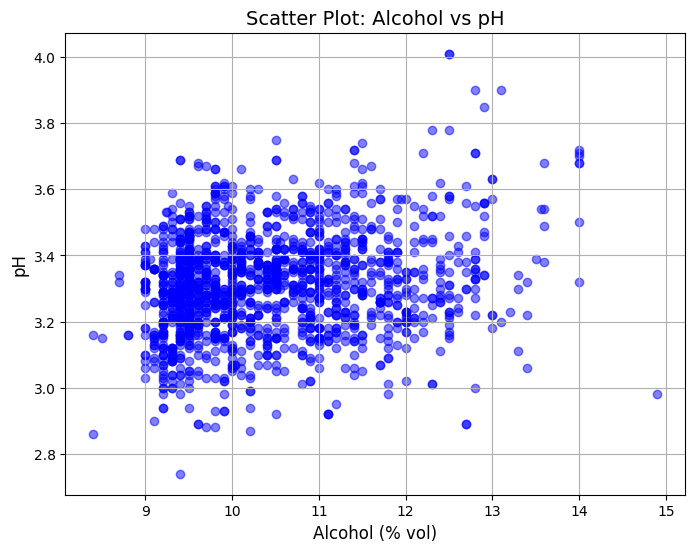

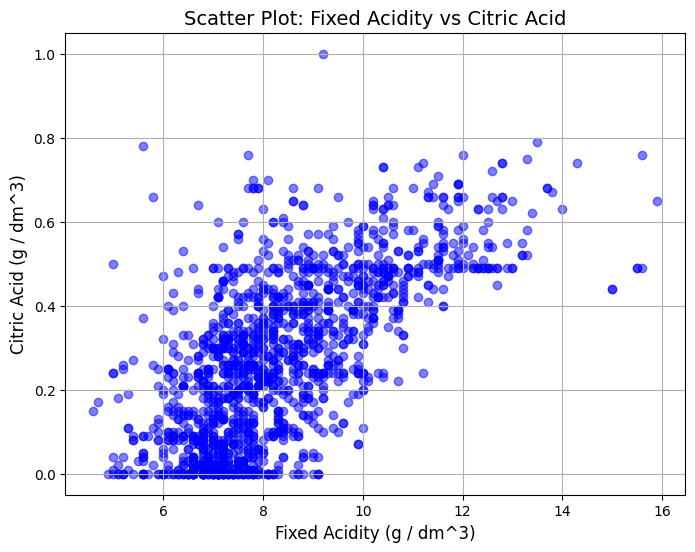

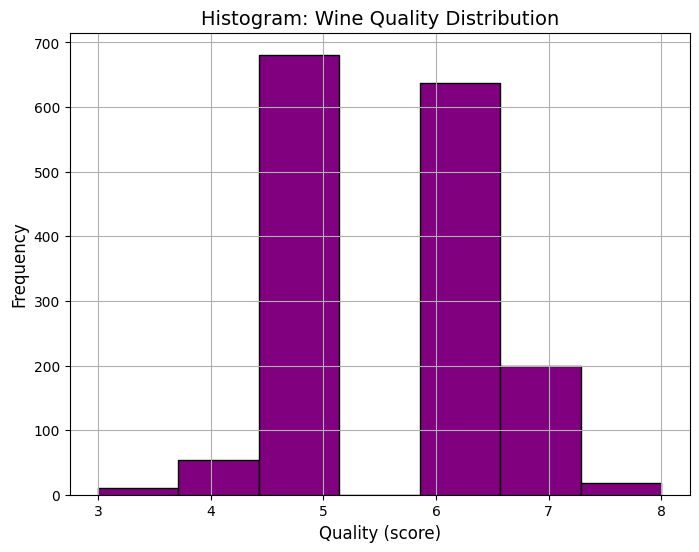

<Figure size 800x600 with 0 Axes>

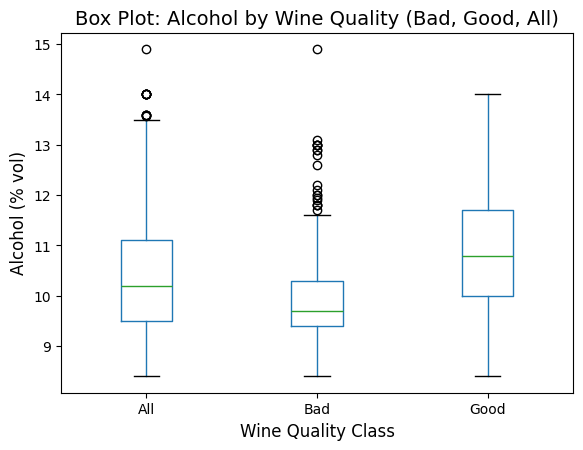

<Figure size 800x600 with 0 Axes>

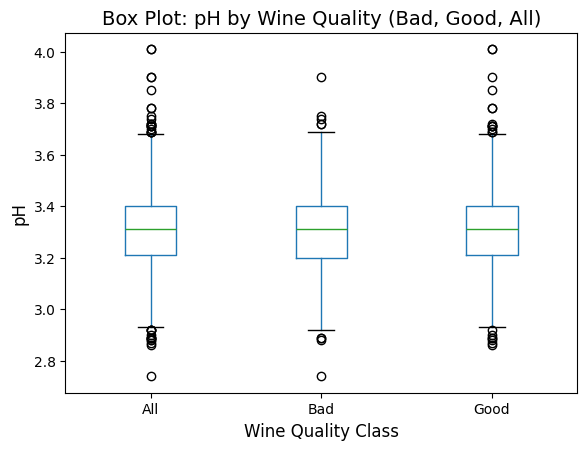

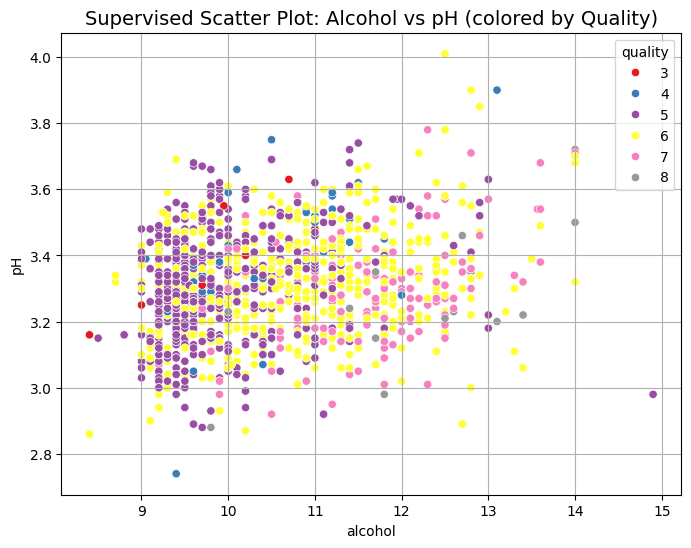

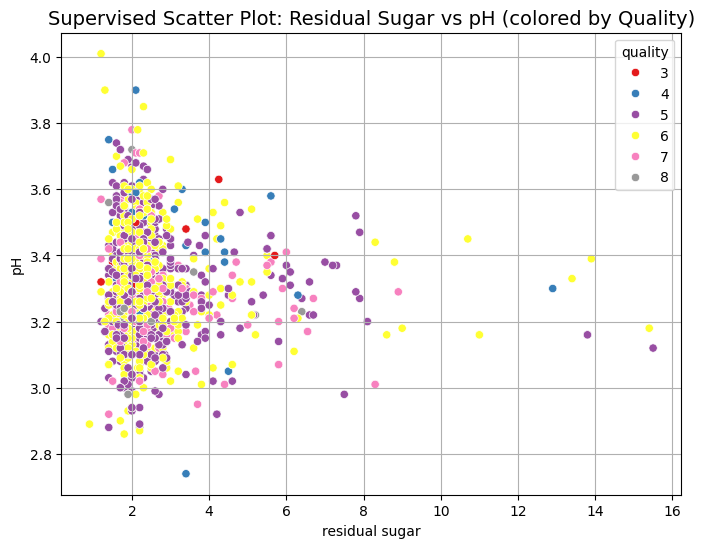

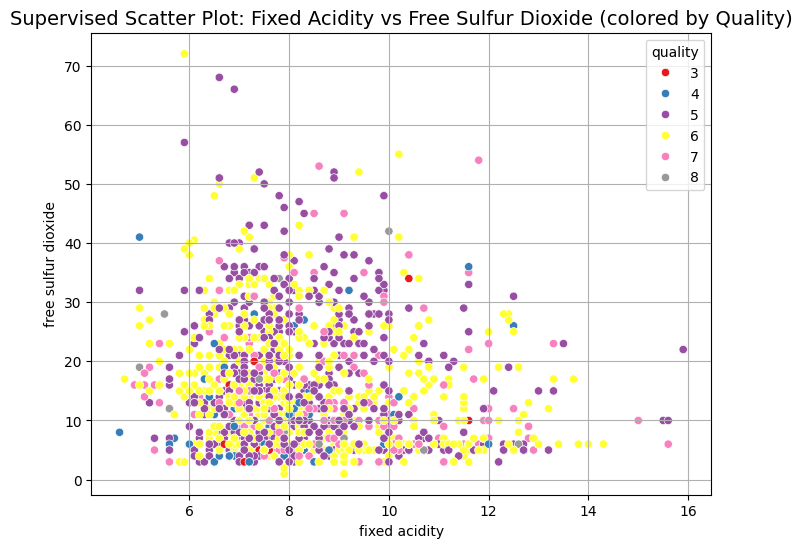

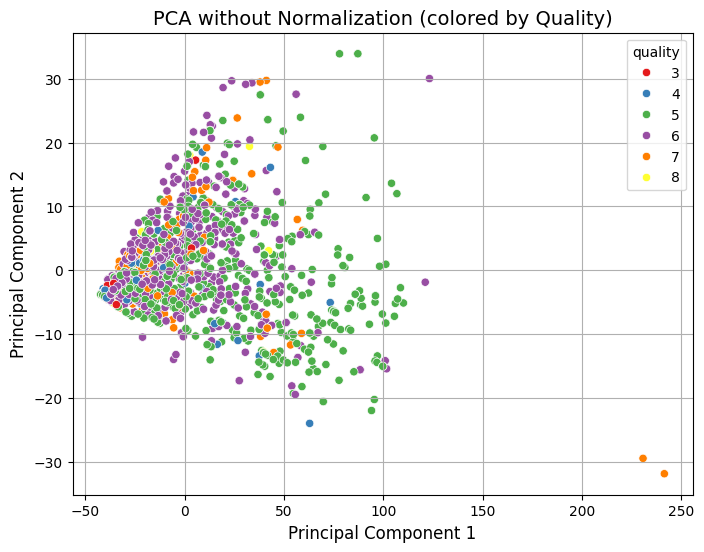

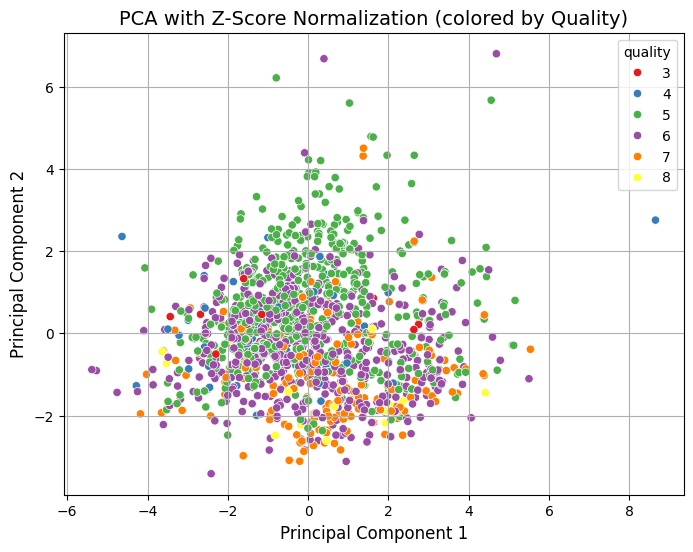

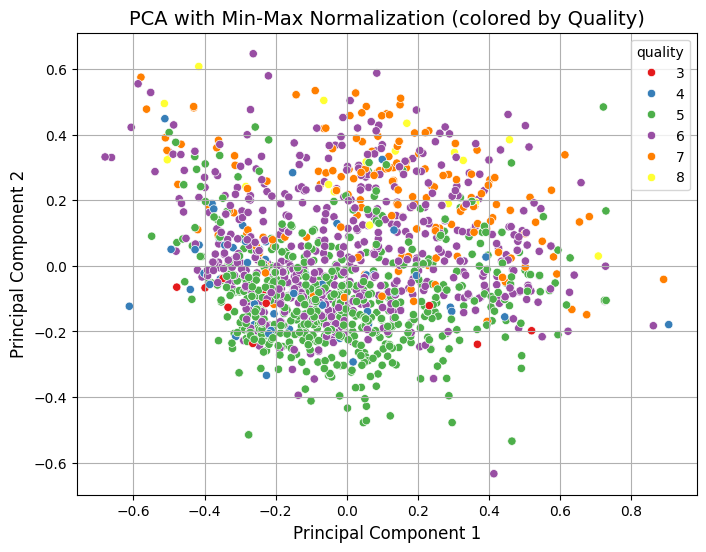

In [22]:
# Load the wine quality dataset
file_path = 'winequality.csv'
wine_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print(wine_data.head())

# Compute the correlation matrix
correlation_matrix = wine_data.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Function to create scatter plots
def create_scatter_plot(x, y, x_label, y_label, title, color='blue'):
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, alpha=0.5, color=color)
    plt.title(title, fontsize=14)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.grid(True)
    plt.show()

# Scatter plots
create_scatter_plot(wine_data['alcohol'], wine_data['pH'], 'Alcohol (% vol)', 'pH', 'Scatter Plot: Alcohol vs pH')
create_scatter_plot(wine_data['fixed acidity'], wine_data['citric acid'], 'Fixed Acidity (g / dm^3)', 'Citric Acid (g / dm^3)', 'Scatter Plot: Fixed Acidity vs Citric Acid')

# Histogram for the quality attribute
plt.figure(figsize=(8, 6))
plt.hist(wine_data['quality'], bins=7, edgecolor='black', color='purple')
plt.title('Histogram: Wine Quality Distribution', fontsize=14)
plt.xlabel('Quality (score)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

# Categorize quality into Bad and Good
wine_data['quality_label'] = wine_data['quality'].apply(lambda x: 'Good' if x > 5 else 'Bad')

# Prepare data for box plots
data_for_boxplot = pd.concat([
    wine_data[['alcohol', 'quality_label']],
    wine_data[['alcohol']].assign(quality_label='All')
])

# Box plot for alcohol by quality labels
plt.figure(figsize=(8, 6))
data_for_boxplot.boxplot(column='alcohol', by='quality_label', grid=False)
plt.title('Box Plot: Alcohol by Wine Quality (Bad, Good, All)', fontsize=14)
plt.suptitle('')
plt.xlabel('Wine Quality Class', fontsize=12)
plt.ylabel('Alcohol (% vol)', fontsize=12)
plt.show()

# Box plot for pH by quality labels
data_for_boxplot_pH = pd.concat([
    wine_data[['pH', 'quality_label']],
    wine_data[['pH']].assign(quality_label='All')
])

plt.figure(figsize=(8, 6))
data_for_boxplot_pH.boxplot(column='pH', by='quality_label', grid=False)
plt.title('Box Plot: pH by Wine Quality (Bad, Good, All)', fontsize=14)
plt.suptitle('')
plt.xlabel('Wine Quality Class', fontsize=12)
plt.ylabel('pH', fontsize=12)
plt.show()

# Define a color palette for the quality class variable
palette = sns.color_palette("Set1", as_cmap=True)

# Supervised scatter plots
def create_supervised_scatter_plot(x, y, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=wine_data, x=x, y=y, hue='quality', palette=palette)
    plt.title(title, fontsize=14)
    plt.grid(True)
    plt.show()

create_supervised_scatter_plot('alcohol', 'pH', 'Supervised Scatter Plot: Alcohol vs pH (colored by Quality)')
create_supervised_scatter_plot('residual sugar', 'pH', 'Supervised Scatter Plot: Residual Sugar vs pH (colored by Quality)')
create_supervised_scatter_plot('fixed acidity', 'free sulfur dioxide', 'Supervised Scatter Plot: Fixed Acidity vs Free Sulfur Dioxide (colored by Quality)')

# Extract features (excluding quality and labels)
features = wine_data.drop(columns=['quality', 'quality_label'])

# Function to perform PCA and plot results
def perform_pca_and_plot(features, title):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(features)
    
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=wine_data['quality'], palette='Set1')
    plt.title(title, fontsize=14)
    plt.xlabel('Principal Component 1', fontsize=12)
    plt.ylabel('Principal Component 2', fontsize=12)
    plt.grid(True)
    plt.show()

# PCA without normalization
perform_pca_and_plot(features, 'PCA without Normalization (colored by Quality)')

# PCA with Z-Score Normalization
features_z_scaled = StandardScaler().fit_transform(features)
perform_pca_and_plot(features_z_scaled, 'PCA with Z-Score Normalization (colored by Quality)')

# PCA with Min-Max Normalization
features_mm_scaled = MinMaxScaler().fit_transform(features)
perform_pca_and_plot(features_mm_scaled, 'PCA with Min-Max Normalization (colored by Quality)')


1.
Correlation Matrix Interpretation:
    Quality and Alcohol: 
        There is a moderate positive correlation (0.48) between alcohol content and wine quality. This suggests that wines with higher alcohol content tend to have better quality ratings.

    Quality and Volatile Acidity: 
        A significant negative correlation (-0.39) exists between volatile acidity and quality, meaning that wines with higher volatile acidity (which contributes to unpleasant flavors) tend to have lower quality.

    Citric Acid and Fixed Acidity: 
        There is a strong positive correlation (0.67) between citric acid and fixed acidity, indicating that these two components are often found together in similar concentrations.

    Density and Alcohol: 
        A moderately strong negative correlation (-0.50) is observed between density and alcohol content, meaning higher alcohol wines tend to have lower densities.

    Free and Total Sulfur Dioxide: 
        There is a strong positive correlation (0.67) between free sulfur dioxide and total sulfur dioxide, which is expected since total sulfur dioxide includes the free form.

    pH and Fixed Acidity: 
        There is a strong negative correlation (-0.68) between pH and fixed acidity, indicating that higher fixed acidity lowers the pH (making the wine more acidic).


2.
Scatter Plot: Alcohol vs pH:
    There is no clear linear relationship between alcohol content and pH.
    However, we can observe a general trend where wines with higher alcohol content tend to have a slightly lower pH (i.e., they are more acidic).
    The points are fairly scattered, which indicates weak correlation, as also reflected in the correlation matrix (0.21).

3.
Scatter Plot: Residual Sugar vs pH:
    No strong correlation: 
        The points seem scattered without a clear linear relationship, suggesting that the pH (acidity) of wine does not directly depend on the residual sugar content.
    Wider spread at higher sugar levels: 
        Wines with higher residual sugar values appear to have a wide range of pH levels, indicating that sweetness does not necessarily predict acidity.
    Concentration of points at lower sugar values: 
        Most wines cluster around lower residual sugar levels with moderate pH, which might reflect common winemaking practices for maintaining balanced acidity and sweetness.
    In summary, residual sugar does not appear to heavily influence pH, but they can vary together in some cases.

4.
Fixed Acidity vs Citric Acid:
    The scatter plot should show a positive relationship between fixed acidity and citric acid, as indicated by the correlation of 0.67 from the correlation matrix.
    This suggests that wines with higher fixed acidity tend to also have higher levels of citric acid, which could indicate that these two compounds are closely related in wine production.

5.
Quaility:
    The histogram will show how frequently each quality score (ranging from 0 to 10) appears in the dataset.
    You can expect the majority of wines to have a quality score around 5 or 6, with fewer wines at the extreme ends (low or high quality).
    This can indicate that most wines are perceived as average, with fewer classified as exceptionally good or bad.

6.
Interpretation:
    Bad: 
        Wines categorized as "Bad" will likely have a lower median alcohol content.
    Good: 
        Wines categorized as "Good" should have a higher median alcohol content, consistent with the positive correlation between alcohol and quality.
    All: 
        The overall box plot should show the general distribution of alcohol content for the entire dataset, with the median falling between the "Bad" and "Good" distributions.


7.
Interpretation:
    Bad: 
        Wines in the "Bad" category might have a slightly higher pH (less acidic), as lower acidity can negatively impact the sensory quality of wine.
    Good: 
        Wines in the "Good" category are likely to have a lower pH (more acidic), which often enhances wine quality.
    All: 
        The overall box plot should show the pH distribution for the entire dataset, with the "All" median likely falling between the "Bad" and "Good" medians.

8.
Alcohol vs pH:
The scatter plot will show how wines of different quality levels are distributed across alcohol content and pH.
Wines with higher alcohol tend to have better quality (darker hues), as shown by clustering at the high alcohol range.
However, pH doesn't show a clear separation of wine quality.

Residual Sugar vs pH:
There is likely little separation between wine quality based on residual sugar and pH, indicating that these attributes might not be strong predictors of quality.
The scatter will likely show significant overlap between different quality levels.

Fixed Acidity vs Free Sulfur Dioxide:
This plot should show some separation between wines of different qualities, particularly in wines with lower free sulfur dioxide and higher fixed acidity.
However, the overlap between the different quality classes is still expected, making classification challenging.


Best Attribute Pair:
Alcohol vs pH is likely the best attribute pair based on previous observations, as alcohol content shows a noticeable relationship with wine quality. However, there is still some overlap, suggesting that it would be difficult to predict quality accurately using just these attributes.

9.
Interpretation:
    PCA without normalization:
        Without normalization, attributes with larger scales dominate the principal components. This can lead to skewed results, making it harder to interpret relationships between the wines.
    PCA with Z-Score normalization:
        Z-Score normalization ensures all features contribute equally to the principal components. The scatter plot from this method should show better clustering of wines based on quality.
    PCA with Min-Max normalization:
        Min-Max scaling compresses all features into a fixed range (0 to 1). While this helps to scale the data, it can distort relationships between attributes if the data contains outliers.

Difference before and after normalization:
    Without normalization: 
        Principal components are dominated by high-magnitude attributes, making patterns harder to see.
    Z-Score normalization: 
        Standardizes the data, leading to clearer clustering based on wine quality.
    Min-Max normalization: 
        Useful for scaling but may not always provide the best separation, especially when dealing with attributes of varied distributions.

Best Normalization Method:
    Z-Score normalization is typically better for PCA since it centers the data around the mean and normalizes the variance, which often leads to more interpretable principal components.

Benefits of PCA in Data Analysis:
    Dimensionality Reduction: 
        PCA reduces the complexity of the dataset by transforming it into fewer dimensions while retaining most of the variance.
    Data Visualization: 
        By reducing to 2 components, PCA helps visualize the separation between data points based on various attributes.
    Feature Importance: 
        PCA helps in identifying which combinations of attributes contribute the most to variations in the data.

10.
Conclusion:
In this analysis, we explored the winequality dataset through data preprocessing, visualizations, and dimensionality reduction using PCA. The key findings and insights can be summarized as follows:

Correlation and Attributes:

Alcohol was found to have the strongest positive correlation with wine quality, suggesting that higher alcohol content generally indicates better wine.
Volatile acidity showed a negative correlation with quality, indicating that high levels of volatile acidity (which can give wine an unpleasant vinegar-like taste) decrease the wine’s perceived quality.
Other attributes, like fixed acidity, citric acid, and sulphates, showed moderate correlations but not as strong as alcohol.
Scatter Plots:

The scatter plots revealed that while some attributes (e.g., alcohol) show trends with wine quality, others (like pH and residual sugar) did not clearly differentiate wine classes.
The Alcohol vs pH scatter plot demonstrated that high-alcohol wines tend to have slightly lower pH and better quality, but the separation of wine quality classes was still not perfect.
Box Plots:

Alcohol: Wines classified as Good had higher alcohol levels, reinforcing alcohol's importance in predicting quality.
pH: The pH box plot showed that Good wines tend to be more acidic, but this trend wasn't as strong compared to alcohol.
PCA and Normalization:

Performing PCA on the dataset highlighted that attributes such as alcohol, sulphates, and volatile acidity contribute significantly to the principal components.
Normalizing the dataset using Z-Score normalization produced the best results for PCA, as it allowed better separation of wine quality classes, making patterns clearer. Min-Max normalization also helped, but Z-Score was more effective for dimensionality reduction.
PCA is highly useful for reducing the complexity of high-dimensional datasets and visualizing data trends that are otherwise hidden.
Predicting Wine Quality:
The alcohol content and volatile acidity appear to be the most useful predictors of wine quality based on their strong correlations and their impact on sensory perceptions of wine.
However, predicting wine quality remains complex, as other factors such as citric acid, sulphates, and acidity contribute but are not definitive indicators on their own.
Learning from the Dataset:
As an individual, this dataset highlights the delicate balance of chemical properties that influence the quality of wine. Understanding how specific attributes like acidity, sulphur content, and alcohol interact helps to appreciate the complexities involved in wine production and tasting. This analysis also reinforces the importance of data preprocessing and visualization in uncovering patterns that might otherwise go unnoticed.

In summary, this dataset provided valuable insights into wine attributes and their effects on quality, with alcohol standing out as the most significant predictor.